In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_excel("D:\sahil\project data trained\India_Crimeforproject.xlsx")
df

STATE/UT  YEAR    Region  Literacy_Rate  Population   \
0    A & N ISLANDS  2001  Southern          81.30     356152.0   
1    A & N ISLANDS  2002  Southern          81.80     358531.0   
2    A & N ISLANDS  2003  Southern          82.30     360910.0   
3    A & N ISLANDS  2004  Southern          82.80     363290.0   
4    A & N ISLANDS  2005  Southern          83.30     365669.0   
..             ...   ...       ...            ...          ...   
415    WEST BENGAL  2008   Eastern          80.09   87239781.0   
416    WEST BENGAL  2009   Eastern          80.62   88248865.0   
417    WEST BENGAL  2010   Eastern          81.16   89257948.0   
418    WEST BENGAL  2011   Eastern          81.69   90267032.0   
419    WEST BENGAL  2012   Eastern          82.87   91276115.0   

     total literate population  Area (km2)  MURDER  ATTEMPT TO MURDER  \
0                       289552        8249      13                  0   
1                       293278        8249      14                  3   
2                       297029        8249      16                  4   
3                       300804        8249      13                  1   
4                       304602        8249      14                  3   
..                         ...         ...     ...                ...   
415                   69870341       88752     192                168   
416                   71146235       88752     229                238   
417                   72441751       88752     244                224   
418                   73739138       88752     232                215   
419                   75640517       88752     140                108   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  ...  \
0                                            0  ...   
1                                            0  ...   
2                                            1  ...   
3                                            2  ...   
4                                            3  ...   
..                                         ...  ...   
415                                         47  ...   
416                                        241  ...   
417                                        179  ...   
418                                        126  ...   
419                                         80  ...   

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             1                                    9   
1                             3                                    4   
2                             2                                    7   
3                             3                                    5   
4                             1                                    5   
..                          ...                                  ...   
415                           5                                 1946   
416                           3                                 2225   
417                           8                                 2378   
418                          10                                 2847   
419                           1                                 1860   

     IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                              0                            0   
1                                              0                            0   
2                                              0                            0   
3                                              0                            6   
4                                              0                            3   
..                                           ...                          ...   
415                                            0                           12   
416                                            0                            4   
417                                            5                           11   
418 

In [3]:
north=['HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'PUNJAB', 'RAJASTHAN', 'UTTAR PRADESH', 'UTTARAKHAND', 'DELHI','CHANDIGARH']
central=['MADHYA PRADESH', 'CHATTISGARH']
west=['GOA', 'GUJARAT', 'MAHARASHTRA', 'D & N HAVELI', 'DAMAN & DIU']
south=['ANDHRA PRADESH', 'KARNATAKA','KERELA', 'TAMIL NADU','PUDUCHERRY']
northeast=['ARUNACHAL PRADESH', 'ASSAM', 'NAGALAND', 'SIKKIM', 'MIZORAM', 'MEGHALAYA', 'TRIPURA', 'MANIPUR']
east=['BIHAR', 'JHARKHAND', 'ODISHA', 'WEST BENGAL']
islands=['A& N ISLANDS', 'LAKSHADWEEP']

We have grouped the states into regions for easy comparison and to have insights about the regions as well for better understanding.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 41 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             420 non-null    object 
 1   YEAR                                                 420 non-null    int64  
 2   Region                                               420 non-null    object 
 3   Literacy_Rate                                        420 non-null    float64
 4   Population                                           420 non-null    float64
 5   total literate population                            420 non-null    int64  
 6   Area (km²)                                           420 non-null    int64  
 7   MURDER                                               420 non-null    int64  
 8   ATTEMPT TO MURDER                                    420 non-null    i

In [6]:
df.isna().sum()

STATE/UT                                               0
YEAR                                                   0
Region                                                 0
Literacy_Rate                                          0
Population                                             0
total literate population                              0
Area (km²)                                             0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DA

In [7]:
df.describe()

YEAR  Literacy_Rate   Population   total literate population  \
count   420.000000     420.000000  4.200000e+02               4.200000e+02   
mean   2006.500000      79.435738  3.202408e+07               2.421575e+07   
std       3.456169       9.162718  4.053739e+07               3.031000e+07   
min    2001.000000      47.000000  6.065000e+04               5.570700e+04   
25%    2003.750000      74.542500  1.267215e+06               1.077273e+06   
50%    2006.500000      80.840000  1.531922e+07               1.283174e+07   
75%    2009.250000      85.520000  5.697575e+07               4.292811e+07   
max    2012.000000      96.700000  1.998123e+08               1.560934e+08   

          Area (km²)      MURDER  ATTEMPT TO MURDER  \
count     420.000000  420.000000         420.000000   
mean    84358.114286   41.038095          32.838095   
std     96841.083608   43.848225          41.833828   
min         1.000000    0.000000           0.000000   
25%      7096.000000   10.000000           6.000000   
50%     50362.000000   25.000000          18.000000   
75%    135191.000000   53.000000          43.000000   
max    342239.000000  244.000000         247.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER        RAPE  CUSTODIAL RAPE  \
count                                  420.00000  420.000000           420.0   
mean                                     5.95000   26.402381             0.0   
std                                     18.57141   32.641285             0.0   
min                                      0.00000    0.000000             0.0   
25%                                      0.00000    5.000000             0.0   
50%                                      1.00000   16.000000             0.0   
75%                                      4.00000   37.250000             0.0   
max                                    241.00000  231.000000             0.0   

       ...  INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
count  ...                  420.000000                           420.000000   
mean   ...                   11.154762                           149.647619   
std    ...                   26.879246                           332.314821   
min    ...                    0.000000                             0.000000   
25%    ...                    0.000000                             3.000000   
50%    ...                    1.000000                            24.000000   
75%    ...                    8.000000                           129.250000   
max    ...                  163.000000                          2847.000000   

       IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
count                                   420.000000   
mean                                      0.035714   
std                                       0.325761   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                       0.000000   
max                                       5.000000   

       CAUSING DEATH BY NEGLIGENCE  TOTAL IPC CRIMES   Crimes Against SCs  \
count                   420.000000        420.000000           420.000000   
mean                     95.835714       2943.954762            23.409524   
std                     174.495356       4027.324355            45.225332   
min                       0.000000         15.000000             0.000000   
25%                       2.000000        376.500000             0.000000   
50%                      20.500000       1451.000000             2.000000   
75%                     112.250000       3545.250000            28.250000   
max                    1330.000000      21442.000000           376.000000   

       Crimes Against STs  Crime_against_children  crime_against_women  \
count          420.000000              420.000000           420.000000   
mean             5.300000               23.714286    

The information above reveals the following:
Each column's range, mean, and standard deviation
For each column, each quartile


# 2.1 Analysis of Literacy Rate vs Total Crimes

Text(0, 0.5, 'Total Crimes')

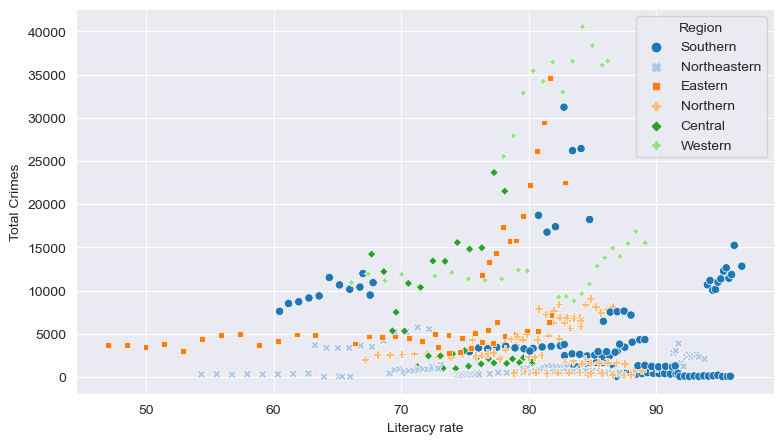

In [16]:
pt.figure(figsize=(9,5))
sb.set_style('darkgrid')
sb.scatterplot(x=df['Literacy_Rate'],y=df['Total_crime'],hue=df['Region'],style=df['Region'],palette='tab20')
pt.xlabel('Literacy rate')
pt.ylabel('Total Crimes')

As we can see from the above, the southeast and north-east regions have the highest rates of literacy, whereas the west, central, and northern regions have the highest overall crime rates. And while there are certain instances of high literacy rates associated by high total crimes, as shown in the central and southern regions, it is evident that total crimes fall as the literacy rate rises, indicating an indirect relationship between the two.


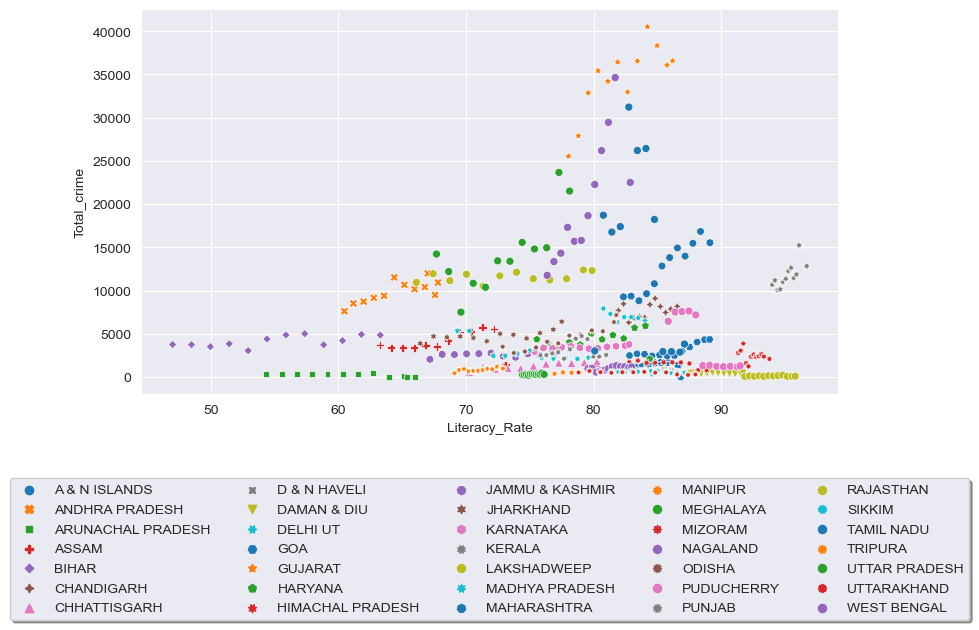

In [25]:
pt.figure(figsize=(9,5))
sb.scatterplot(x=df['Literacy_Rate'],y=df['Total_crime'],hue=df['STATE/UT'],style=df['STATE/UT'],palette='tab10')
pt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

As we can see from the region graph, Lakshadweep, Mizoram, Kerela rank among the states with the highest literacy rates.But, as we can see, Delhi is tied with Maharashtra for having one of the highest rates of overall crime. However, if we only consider the overall number of crimes, the states with the greatest number are Andhra Pradesh and West Bengal.

In conclusion, we find that overall crime rates decline as literacy rates rise, with a few exceptions made by urban and metropolitan states like Delhi, Maharashtra, and Kerela.


# 2.2) Analysis of the type of crime vs each state vs Literacy rate.
For this we will be plotting each type of crime on y axis and literacy rate on x axis with states as hue.

# Literacy rate vs Attempt to murder vs Each State

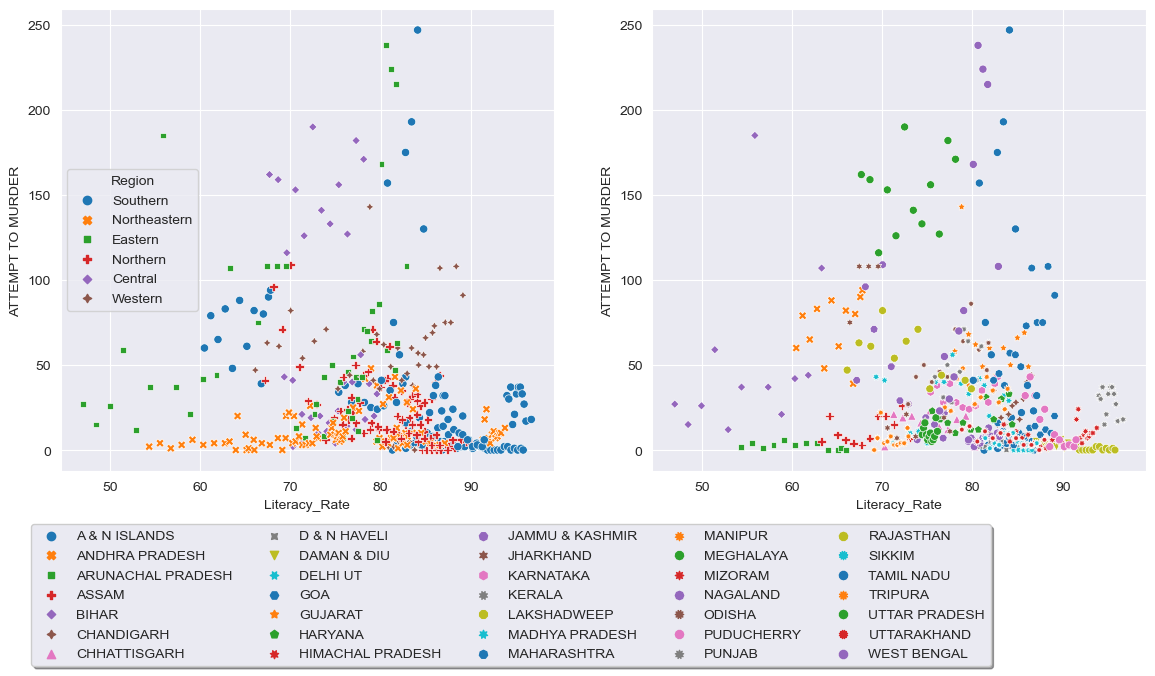

In [28]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='ATTEMPT TO MURDER',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='ATTEMPT TO MURDER',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

The graphs above show that the Southern area has the greatest rate of murder attempts, with West Bengal and uttar Pradesh ranking first and second, respectively. While the majority of the northeastern states, including Lakshadweep and Arunachal Pradesh, and some of the southern states, have extremely low murder attempt rates.


# Literacy rate vs Murder vs Each State

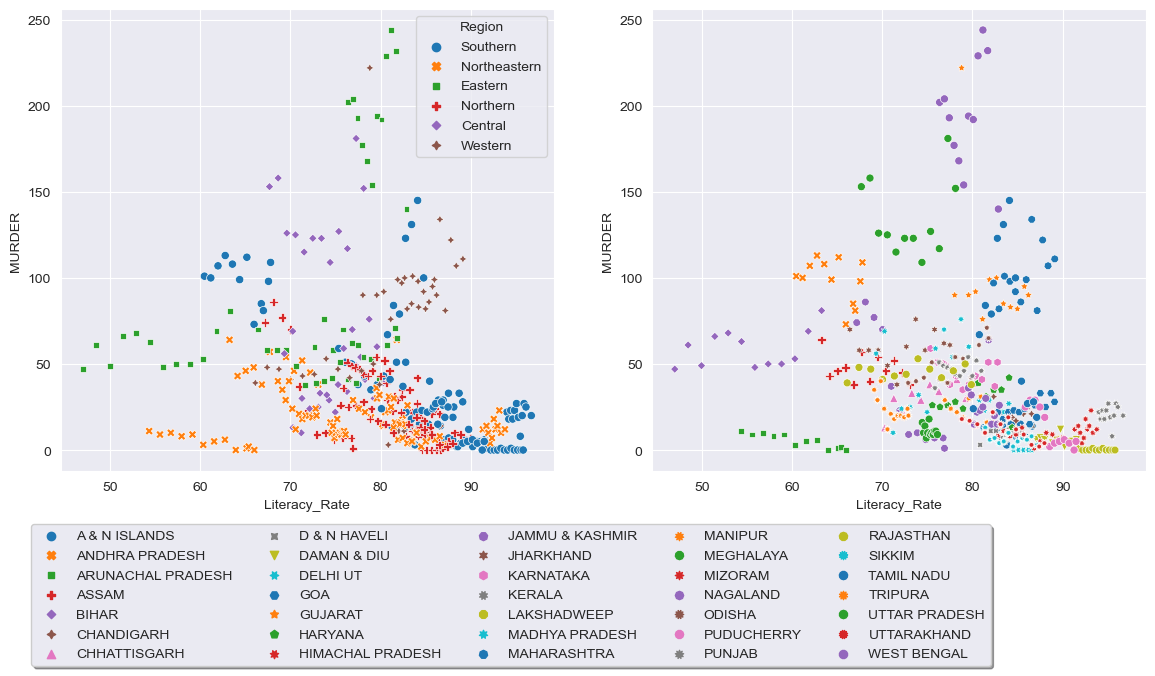

In [32]:
fig,axes=pt.subplots(1,2,figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='MURDER',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='MURDER',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

The same pattern applies to attempts at murder: West Bengal and uttar Pradesh rank highest in terms of murders while having among of the lowest rates of literacy. This suggests that there is some indirect correlation between murders and literacy rates.


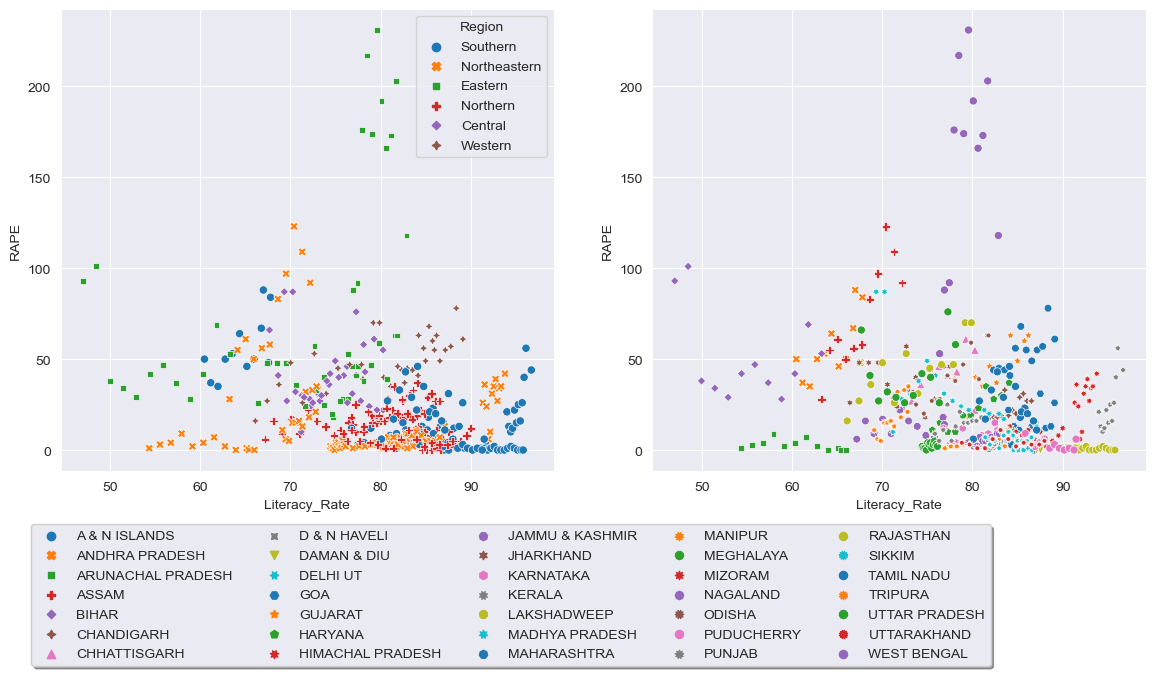

In [33]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='RAPE',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='RAPE',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From the above, it is evident that, with the exception of West Bengal and Assam, there is a dramatic reduction in the number of rapes perpetrated when 80% of the population is literate. Aside from that, the left plot shows that the northeast, islands, and a few west and south states


# Literacy rate vs Kidnapping and abduction vs Each State

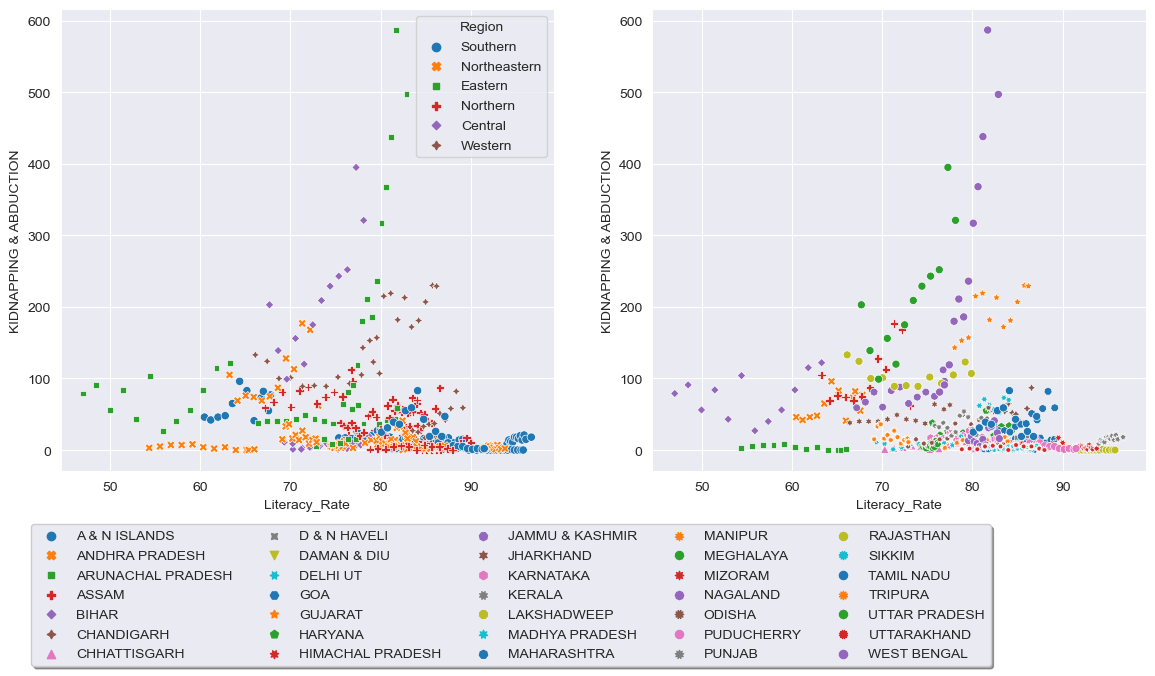

In [34]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='KIDNAPPING & ABDUCTION',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='KIDNAPPING & ABDUCTION',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

The graphs above show that West Bengal has reclaimed its top spot, followed by Uttar Pradesh. And once more, states in the northeast, south, and islands had the lowest rates of both disease and literacy.


# Literacy rate vs Dacoity vs Each State

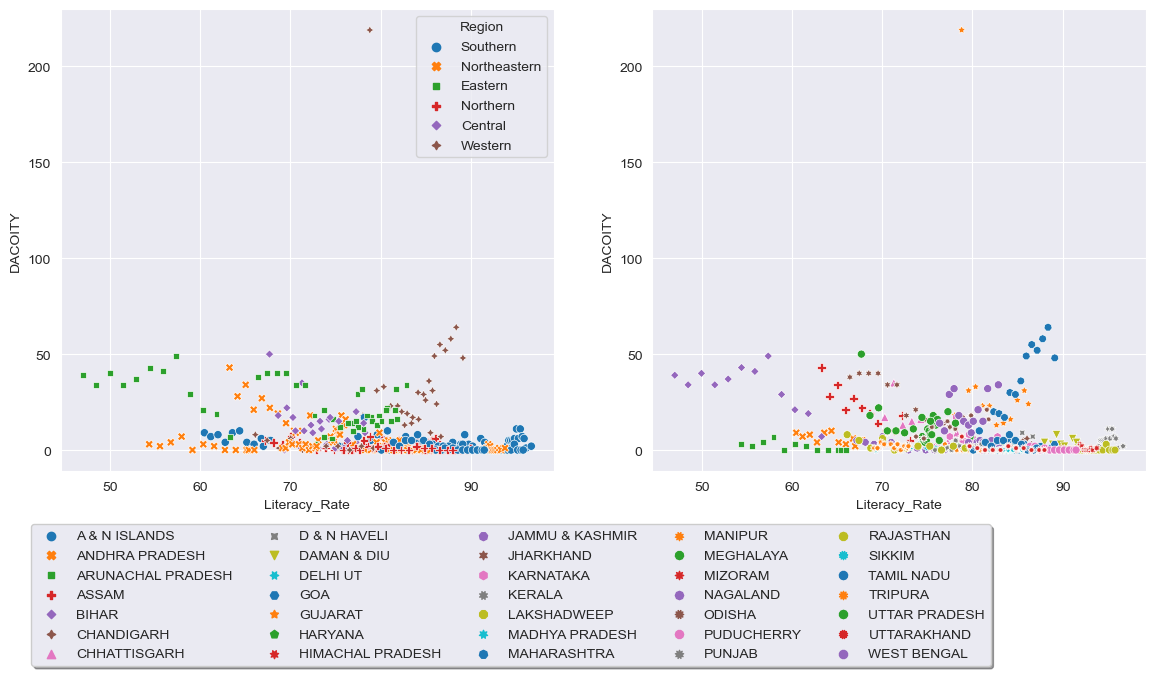

In [35]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='DACOITY',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='DACOITY',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

Bihar has the largest number of cases of dacoity and the lowest literacy rate, demonstrating the indirect association once more. The only state with a high percentage of cases and a literacy rate of above 80% is Maharashtra.


# Literacy rate vs Riots vs Each State

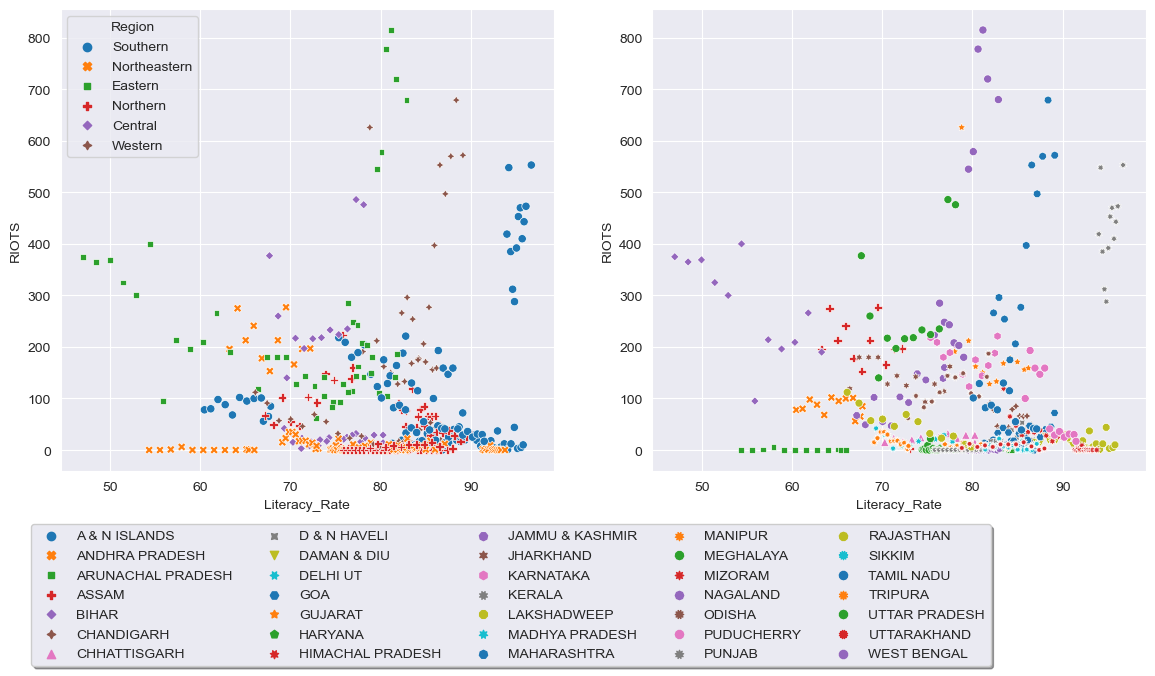

In [36]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='RIOTS',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='RIOTS',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From the data, it is evident that riots happen throughout the nation, regardless of literacy rates, with low literacy rates in states like Bihar and high literacy rates in Kerela. Thus, the two are unrelated to one another.


# Literacy rate vs Cheating vs Each State

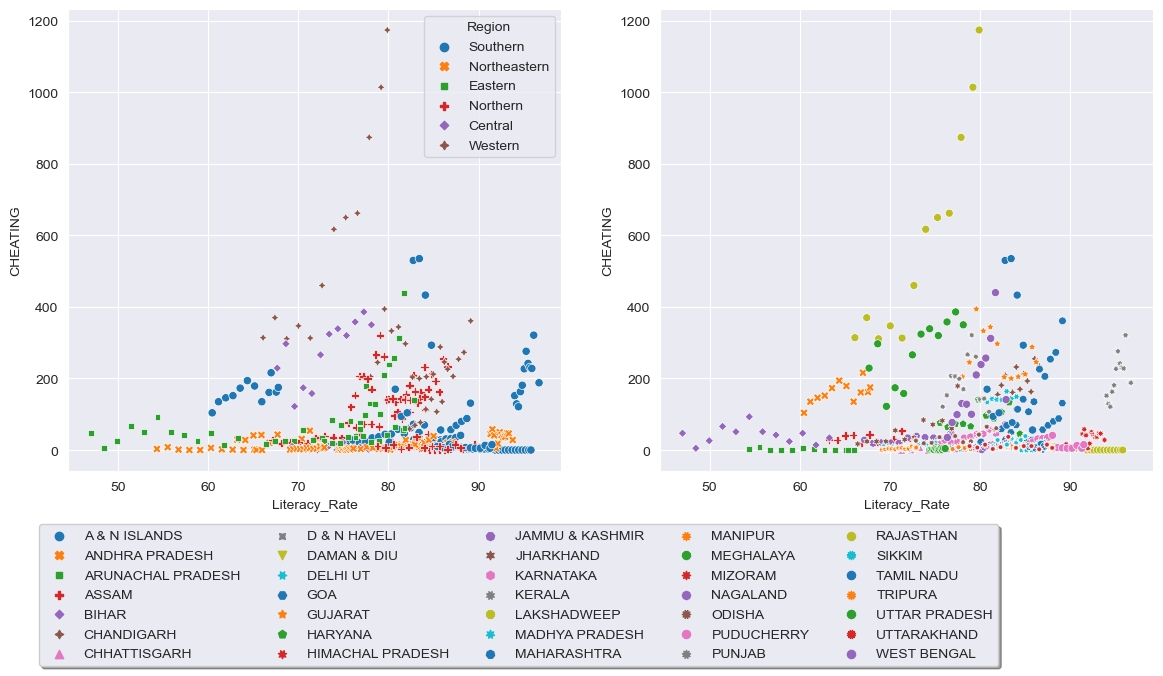

In [38]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='CHEATING',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='CHEATING',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

The state with the highest number of cheating cases is Rajasthan, and it is evident that, with the exception of Maharashtra, incidents decrease as literacy rates rise, suggesting a possible indirect relationship between the two.


# Literacy rate vs Counterfieting vs Each State

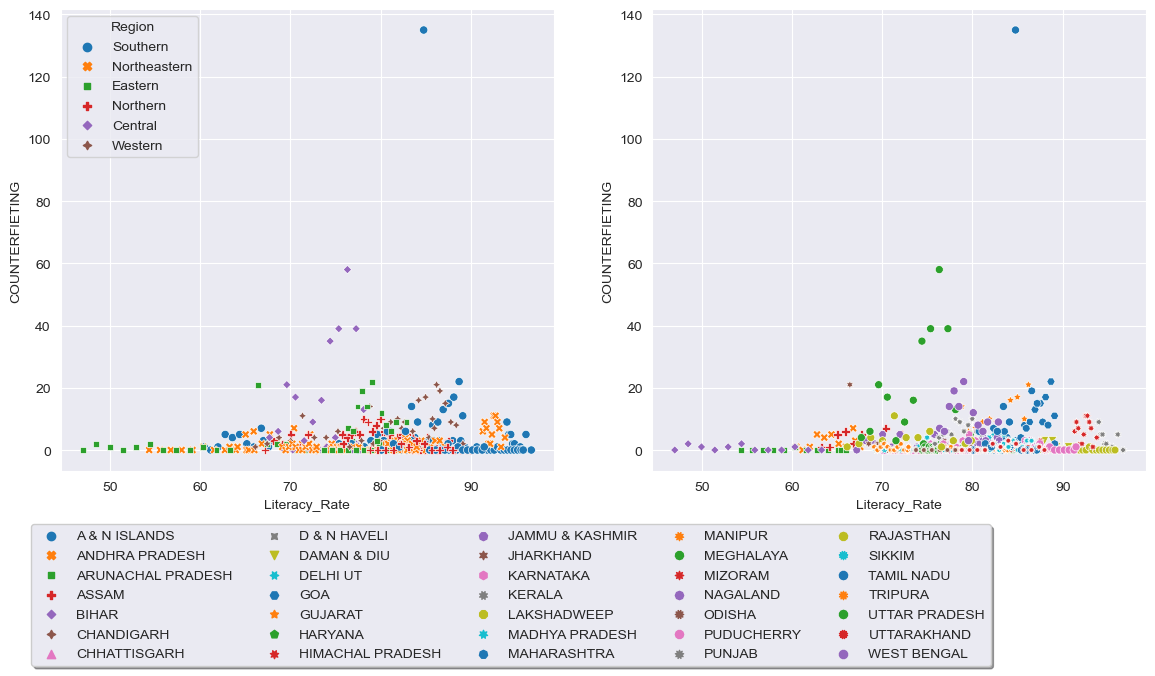

In [40]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='COUNTERFIETING',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='COUNTERFIETING',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

With a high literacy rate, Tamil Nadu takes first spot, followed by Maharashtra and Andhra Pradesh in shared second place. This demonstrates that the top counterfieting states in the South have little correlation with literacy rates.


## Literacy rate vs Dowry Deaths vs Each State     

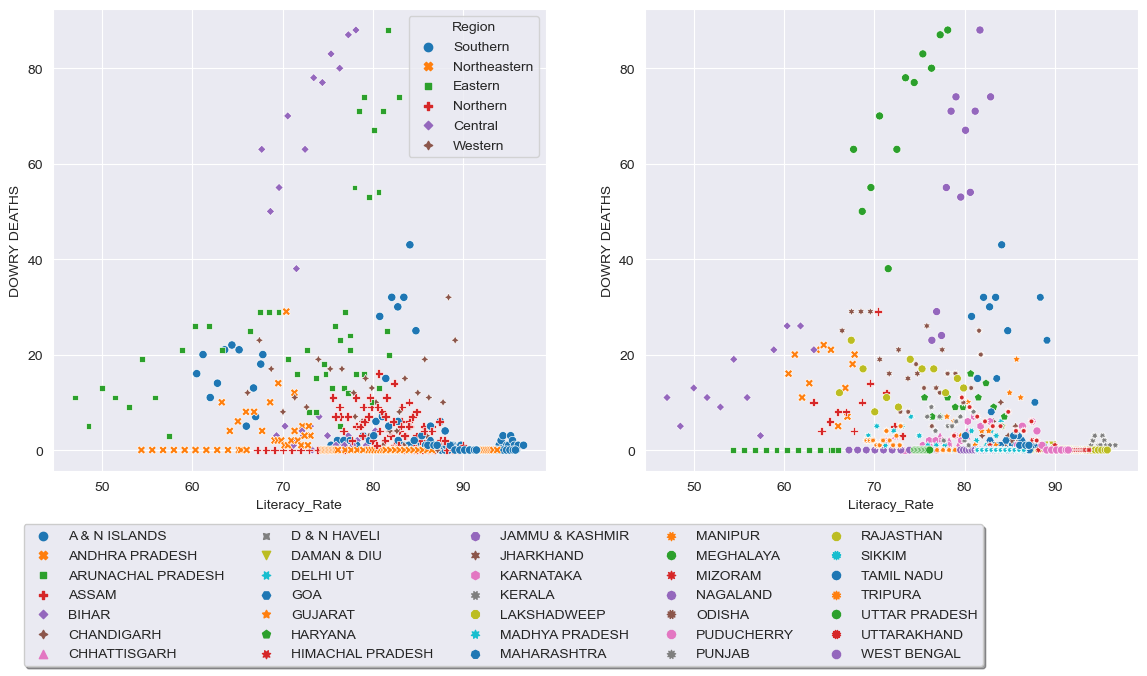

In [42]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='DOWRY DEATHS',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='DOWRY DEATHS',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From the foregoing, it is evident that West Bengal and Uttar Pradesh have the biggest number of cases in this instance


# Literacy rate vs Hurt/Grevious Hurt vs Each State

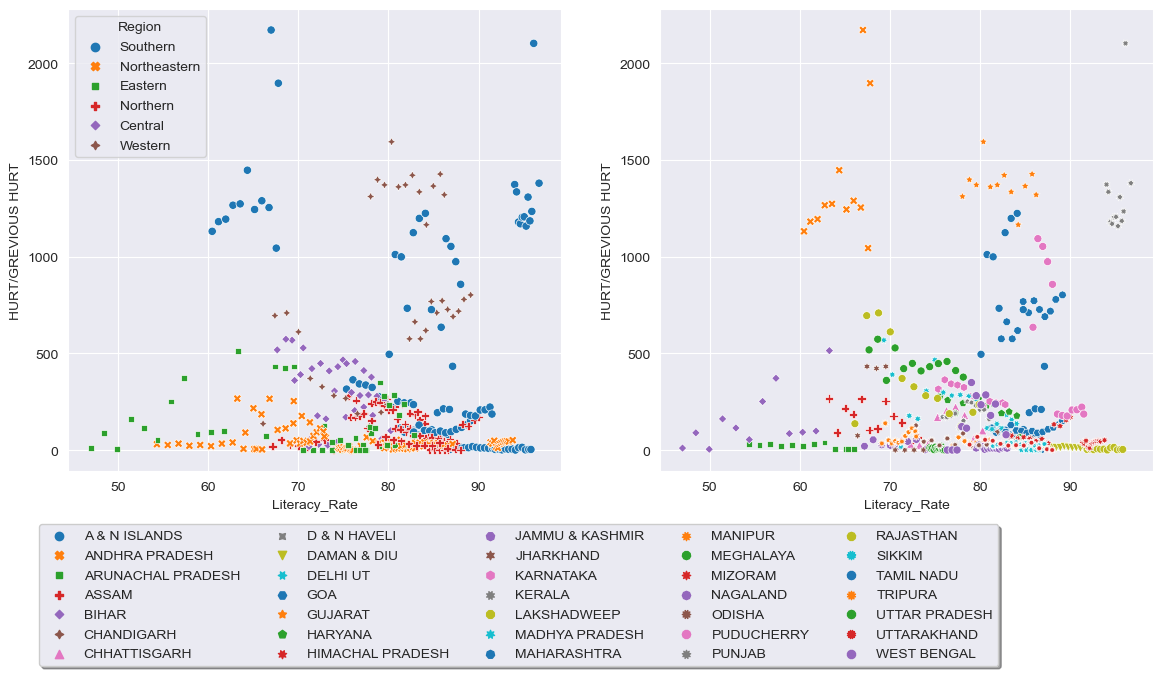

In [44]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='HURT/GREVIOUS HURT',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='HURT/GREVIOUS HURT',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

Andhra Pradesh in this category and we can see the scattered points in all directions which shows there is no relationship between literacy rate and hurt/grevious type of crime.

# Literacy rate vs Cruelty by husband or his relatives vs Each State       

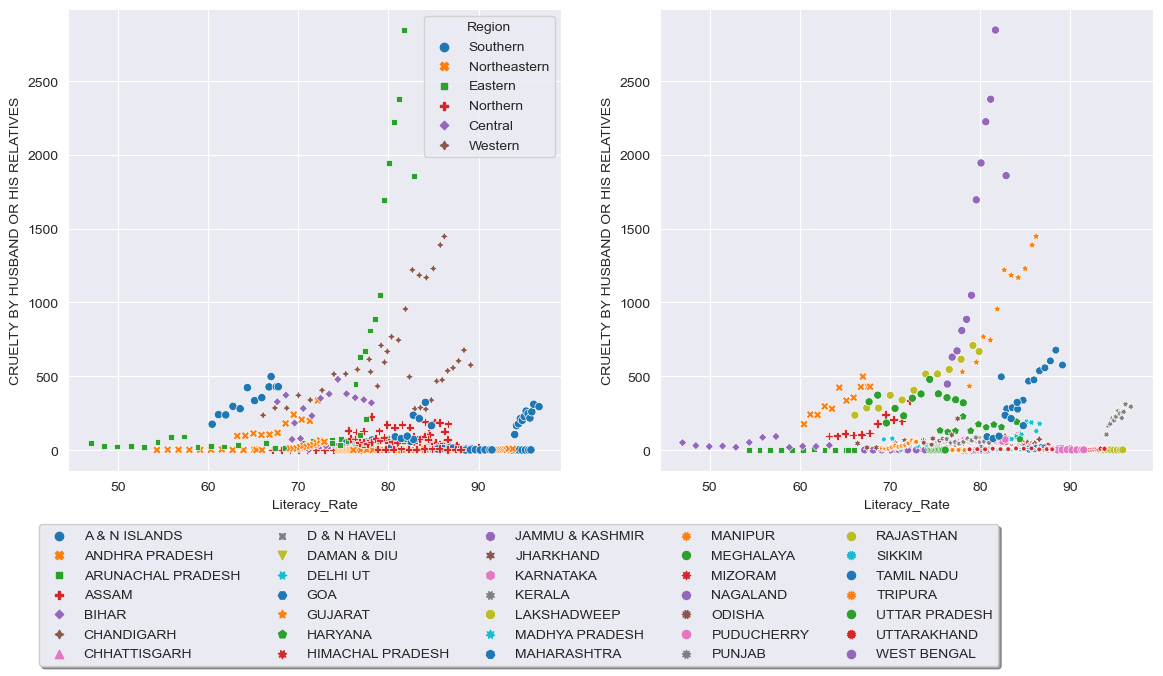

In [45]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='CRUELTY BY HUSBAND OR HIS RELATIVES',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='CRUELTY BY HUSBAND OR HIS RELATIVES',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

The two states with the highest cases are West Bengal, and Rajasthan. Although the number of instances decreases somewhat following a rise in the literacy rate, it doesn't significantly reduce because Kerela, which has the highest literacy rate, nevertheless has more cases than those states with lower literacy rates.


## Literacy rate vs Total IPC crimes vs Each State

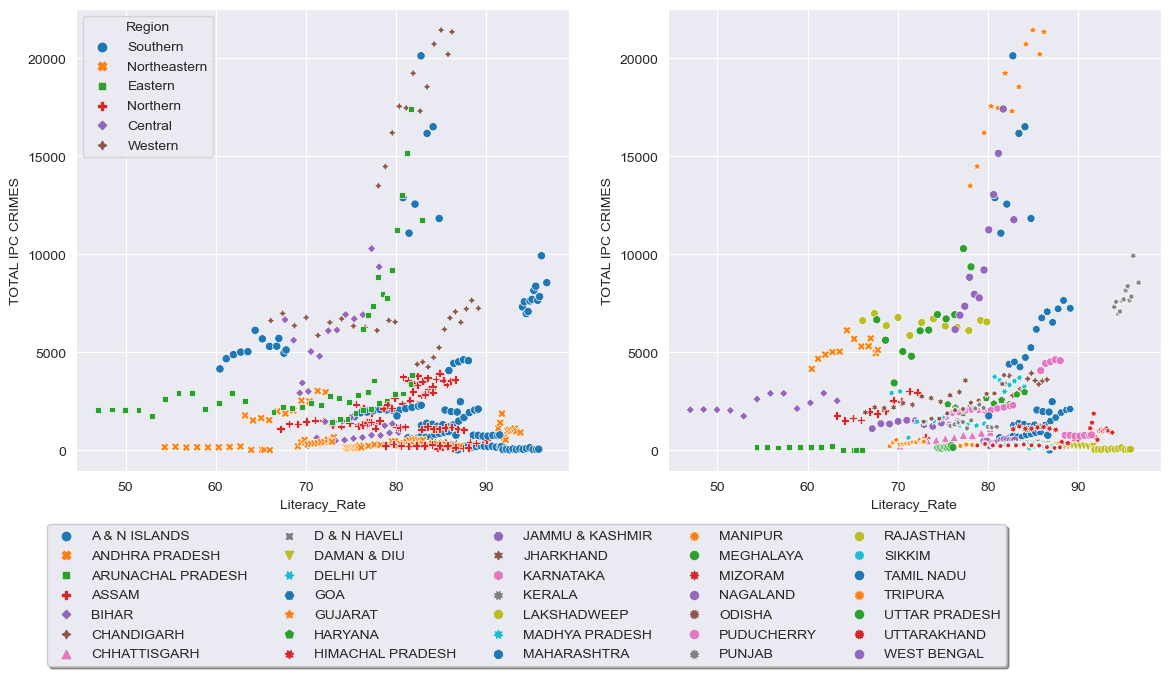

In [46]:
fig,axes = pt.subplots(1,2, figsize=(14,6))
sb.scatterplot(ax=axes[0],x='Literacy_Rate',y='TOTAL IPC CRIMES',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Literacy_Rate',y='TOTAL IPC CRIMES',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

The top three states with the highest total IPC crime rates are Tamil Nadu, Gujarat, and Kerala. These states are also among the highest literacy states, indicating a clear correlation between the two in this instance. This correlation may arise from a variety of factors, including population growth, the number of crimes reported, and others.


# Analysis of year-on-year total crime rate

In [5]:
si=df.set_index("Region")
nr= si.loc[["Northern"]]
nr= nr.reset_index()
nr

Region     STATE/UT  YEAR  Literacy_Rate  Population   \
0   Northern   CHANDIGARH  2001          81.94     900635.0   
1   Northern   CHANDIGARH  2002          82.35     914709.0   
2   Northern   CHANDIGARH  2003          82.76     928783.0   
3   Northern   CHANDIGARH  2004          83.17     942857.0   
4   Northern   CHANDIGARH  2005          83.58     956931.0   
..       ...          ...   ...            ...          ...   
91  Northern  UTTARAKHAND  2008          84.83    9502027.0   
92  Northern  UTTARAKHAND  2009          85.68    9648093.0   
93  Northern  UTTARAKHAND  2010          86.54    9794159.0   
94  Northern  UTTARAKHAND  2011          87.40    9940226.0   
95  Northern  UTTARAKHAND  2012          87.98   10086292.0   

    total literate population  Area (km²)  MURDER  ATTEMPT TO MURDER  \
0                      737980         114      15                 10   
1                      753263         114      31                 35   
2                      768661         114      21                 15   
3                      784174         114      22                 19   
4                      799803         114      18                 15   
..                        ...         ...     ...                ...   
91                    8060569       53483      12                  7   
92                    8266486       53483       9                  3   
93                    8475865       53483       3                  3   
94                    8687757       53483       2                  0   
95                    8873920       53483       4                  6   

    CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  ...  \
0                                           6  ...   
1                                           7  ...   
2                                           2  ...   
3                                          10  ...   
4                                           4  ...   
..                                        ...  ...   
91                                          1  ...   
92                                          3  ...   
93                                          1  ...   
94                                          1  ...   
95                                          1  ...   

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                           15                                   36   
1                           28                                   56   
2                            4                                   93   
3                           18                                   73   
4                            9                                   75   
..                         ...                                  ...   
91                           3                                    9   
92                           0                                   11   
93                           0                                    4   
94                           0                                    6   
95                           5                                    5   

    IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                             0                            6   
1                                             0                            7   
2                                             0                            8   
3                                             0                            5   
4                                             0                            9   
..                                          ...                          ...   
91                                            0                           17   
92                                            0                           25   
93                                            0                           11   
94                                            0                            3   
95

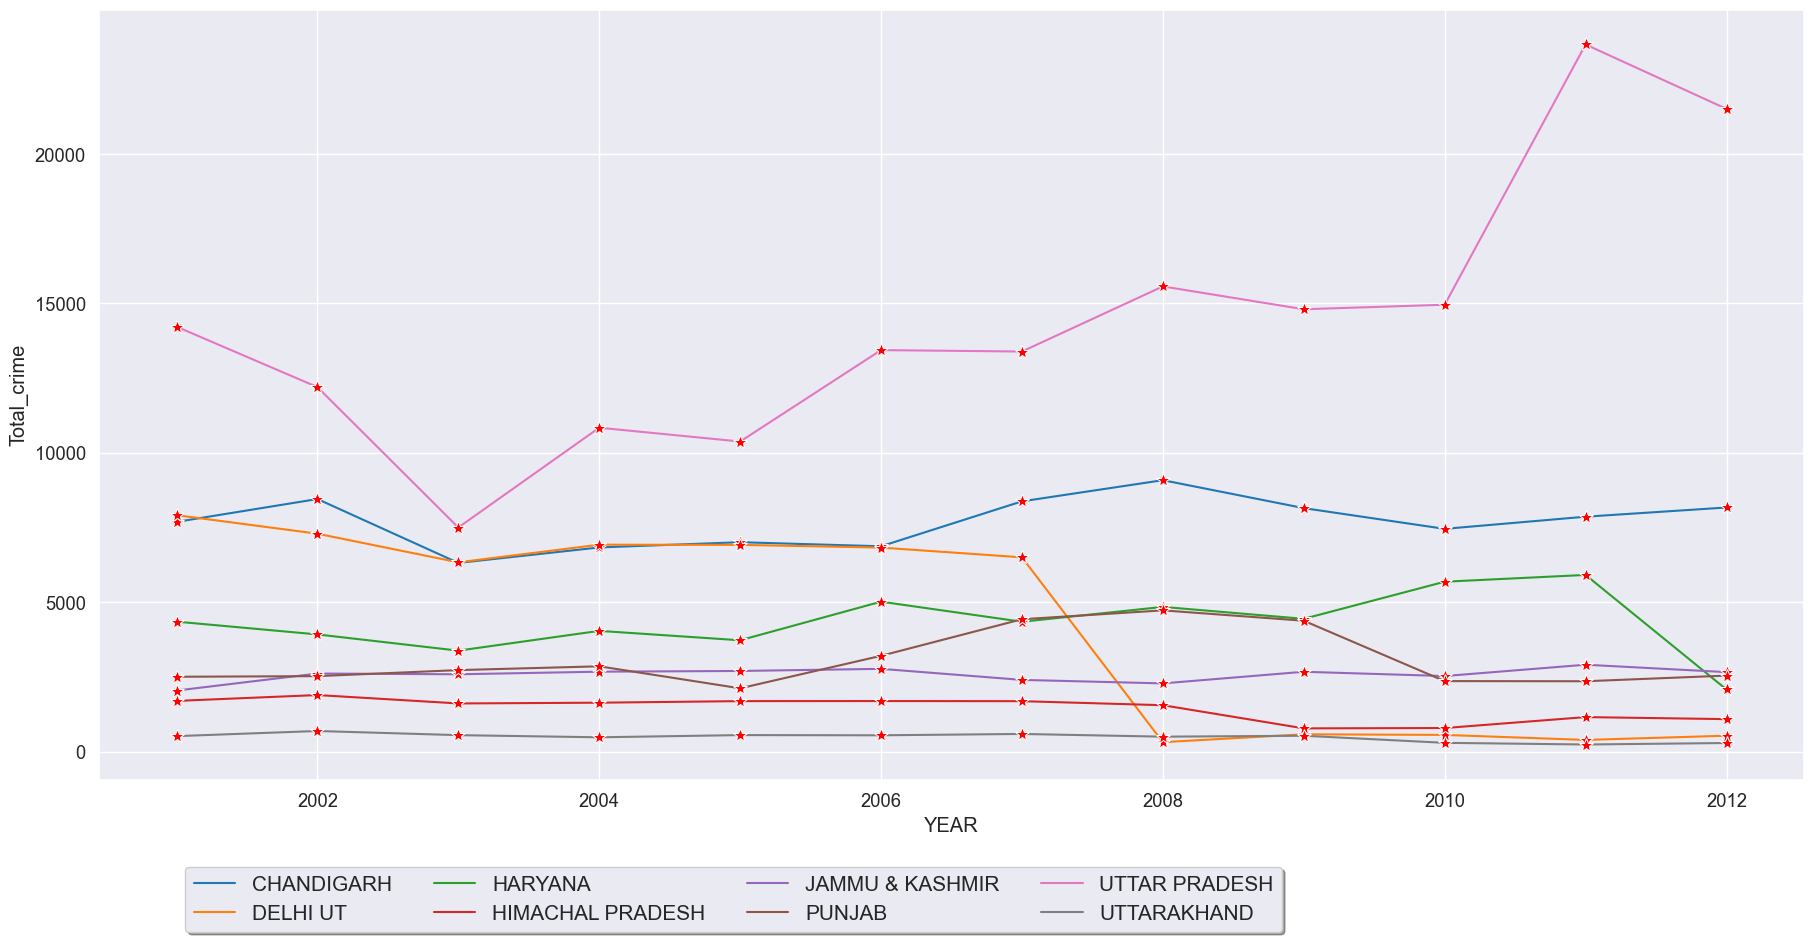

In [6]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=nr,x='YEAR',y='Total_crime',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.show()

Looking up, we see that:

The year 2008 saw the highest crime rate in Chandigarh, while 2003 saw the lowest.
Delhi's crime rates peaked in 2001 and reached their lowest point in 2008.
The year 20012 saw the lowest crime rate in Haryana, and the year 2011 saw the highest.
The year 2007 saw the highest crime rate in Himachal Pradesh, while the year 2012 saw the lowest.
JAMMU & KASHMIR's crime rate peaked in 2003 and fell in 2007. The only year with lower crime rates was 2012.
The crime rate in Punjab peaked in 2008 and peaked in 2009.
UTTAR PRADESH's crime rate peaked in 2011 and fell in 2012.
The rate of crime in Uttarakhand reached its highest point in 2002 and its lowest point in 2011.
Thus, in this northern region, the states with the highest rates of crime are Chandigarh and Uttar Pradesh, while the states with the lowest rates are  Himachal Pradesh and Uttarakhand.


In [9]:
si2=df.set_index("Region")
wr= si2.loc[["Western"]]
wr= wr.reset_index()
wr.head()

Region      STATE/UT  YEAR  Literacy_Rate  Population   \
0  Western  D & N HAVELI  2001          80.85     220490.0   
1  Western  D & N HAVELI  2002          81.44     231692.0   
2  Western  D & N HAVELI  2003          82.02     242893.0   
3  Western  D & N HAVELI  2004          82.60     254095.0   
4  Western  D & N HAVELI  2005          83.19     265297.0   

   total literate population  Area (km²)  MURDER  ATTEMPT TO MURDER  \
0                     178266         491       3                  2   
1                     188690         491      11                  2   
2                     199221         491      11                  5   
3                     209882         491      11                  4   
4                     220701         491       7                  5   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  ...  INSULT TO MODESTY OF WOMEN  \
0                                          0  ...                           0   
1                                          0  ...                           0   
2                                          0  ...                           0   
3                                          0  ...                           0   
4                                          0  ...                           0   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                    4   
1                                    3   
2                                    2   
3                                    3   
4                                    5   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            1   
3                                            0                            8   
4                                            0                           17   

   TOTAL IPC CRIMES   Crimes Against SCs  Crimes Against STs  \
0               350                    0                   6   
1               349                    0                   0   
2               338                    0                  23   
3               409                    0                   4   
4               434                    2                   2   

   Crime_against_children  crime_against_women  Total_crime  
0                       0                   19          597  
1                       0                   15          659  
2                       1                   11          651  
3                      11                   22          734  
4                       5                   24          798  

[5 rows x 41 columns]

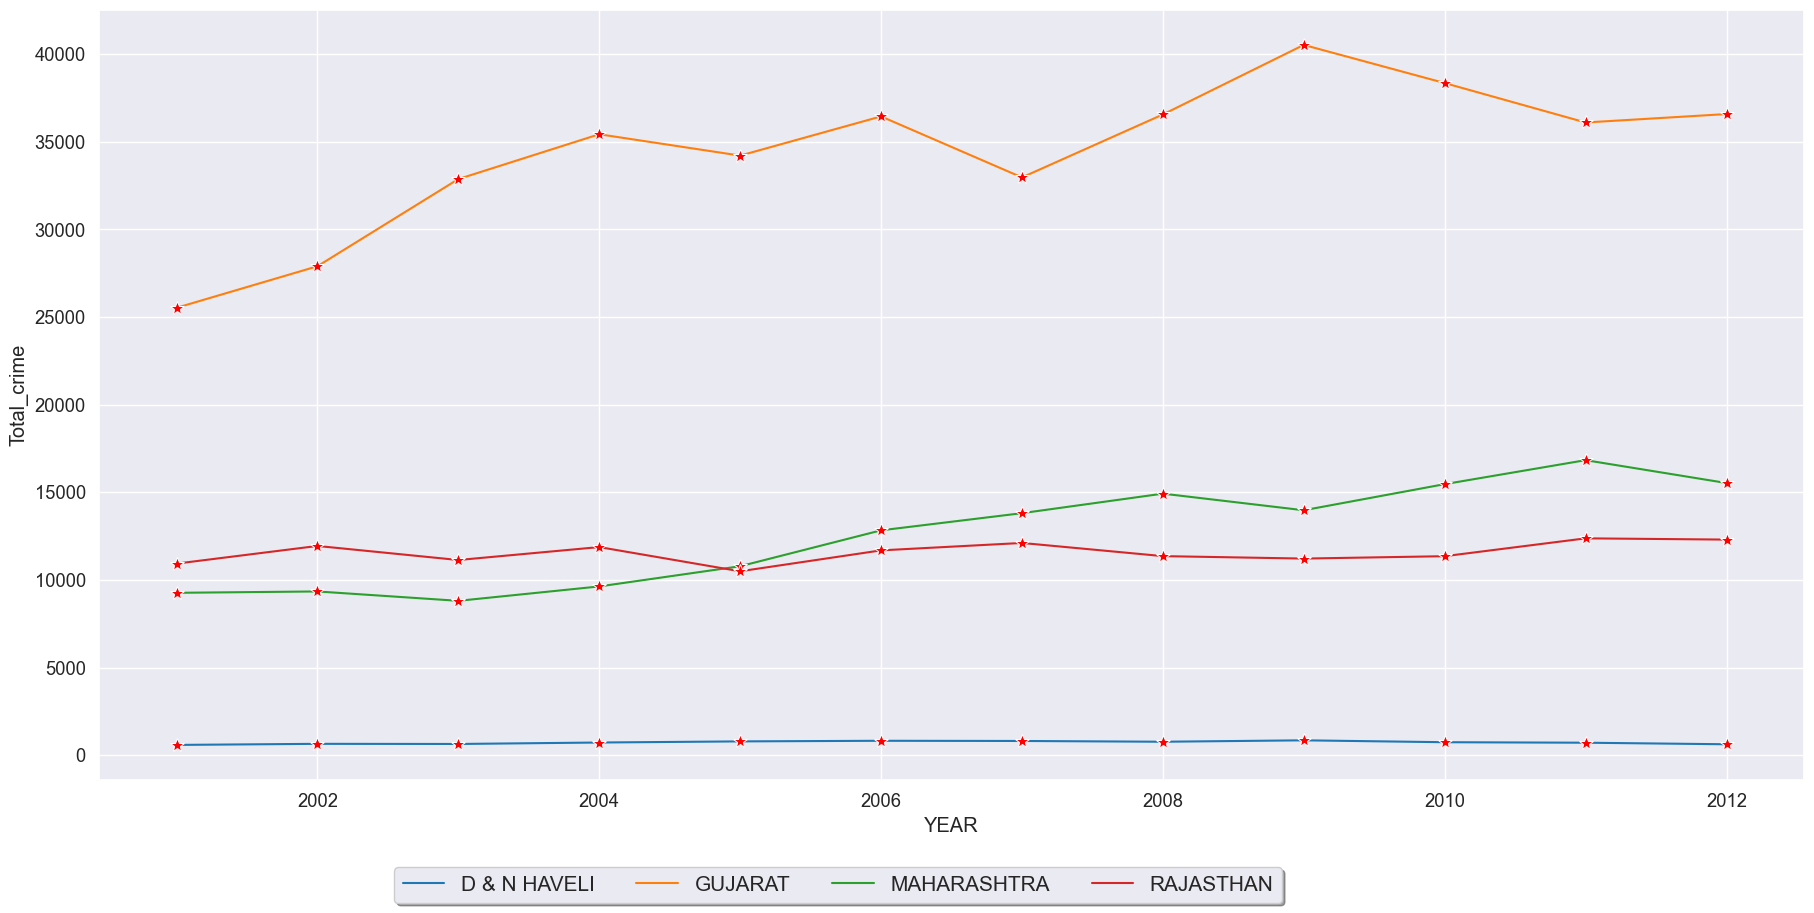

In [10]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=wr,x='YEAR',y='Total_crime',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.show()

The state of Rajasthan saw its highest crime rate in 2004 and its lowest in 2005.
In D & N HAVELI, crime rates peaked in 2004 and fell in 2012. There is a steady decrease in the crime rate.
In Gujarat, the year 2009 saw the highest crime rate and the year 2001 the lowest.
After reaching its peak in 2011, Maharashtra's crime rate has been declining ever since.



In [11]:
si3=df.set_index("Region")
sr= si3.loc[["Southern"]]
sr= sr.reset_index()
sr.head()

Region       STATE/UT  YEAR  Literacy_Rate  Population   \
0  Southern  A & N ISLANDS  2001           81.3     356152.0   
1  Southern  A & N ISLANDS  2002           81.8     358531.0   
2  Southern  A & N ISLANDS  2003           82.3     360910.0   
3  Southern  A & N ISLANDS  2004           82.8     363290.0   
4  Southern  A & N ISLANDS  2005           83.3     365669.0   

   total literate population  Area (km²)  MURDER  ATTEMPT TO MURDER  \
0                     289552        8249      13                  0   
1                     293278        8249      14                  3   
2                     297029        8249      16                  4   
3                     300804        8249      13                  1   
4                     304602        8249      14                  3   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  ...  INSULT TO MODESTY OF WOMEN  \
0                                          0  ...                           1   
1                                          0  ...                           3   
2                                          1  ...                           2   
3                                          2  ...                           3   
4                                          3  ...                           1   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                    9   
1                                    4   
2                                    7   
3                                    5   
4                                    5   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            6   
4                                            0                            3   

   TOTAL IPC CRIMES   Crimes Against SCs  Crimes Against STs  \
0               637                    0                   0   
1               580                    0                   1   
2               611                    0                   1   
3               721                    0                   0   
4               666                    0                   2   

   Crime_against_children  crime_against_women  Total_crime  
0                       0                   33         1067  
1                       0                   25          919  
2                       6                   22         1014  
3                      13                   26         1221  
4                       8                   21         1103  

[5 rows x 41 columns]

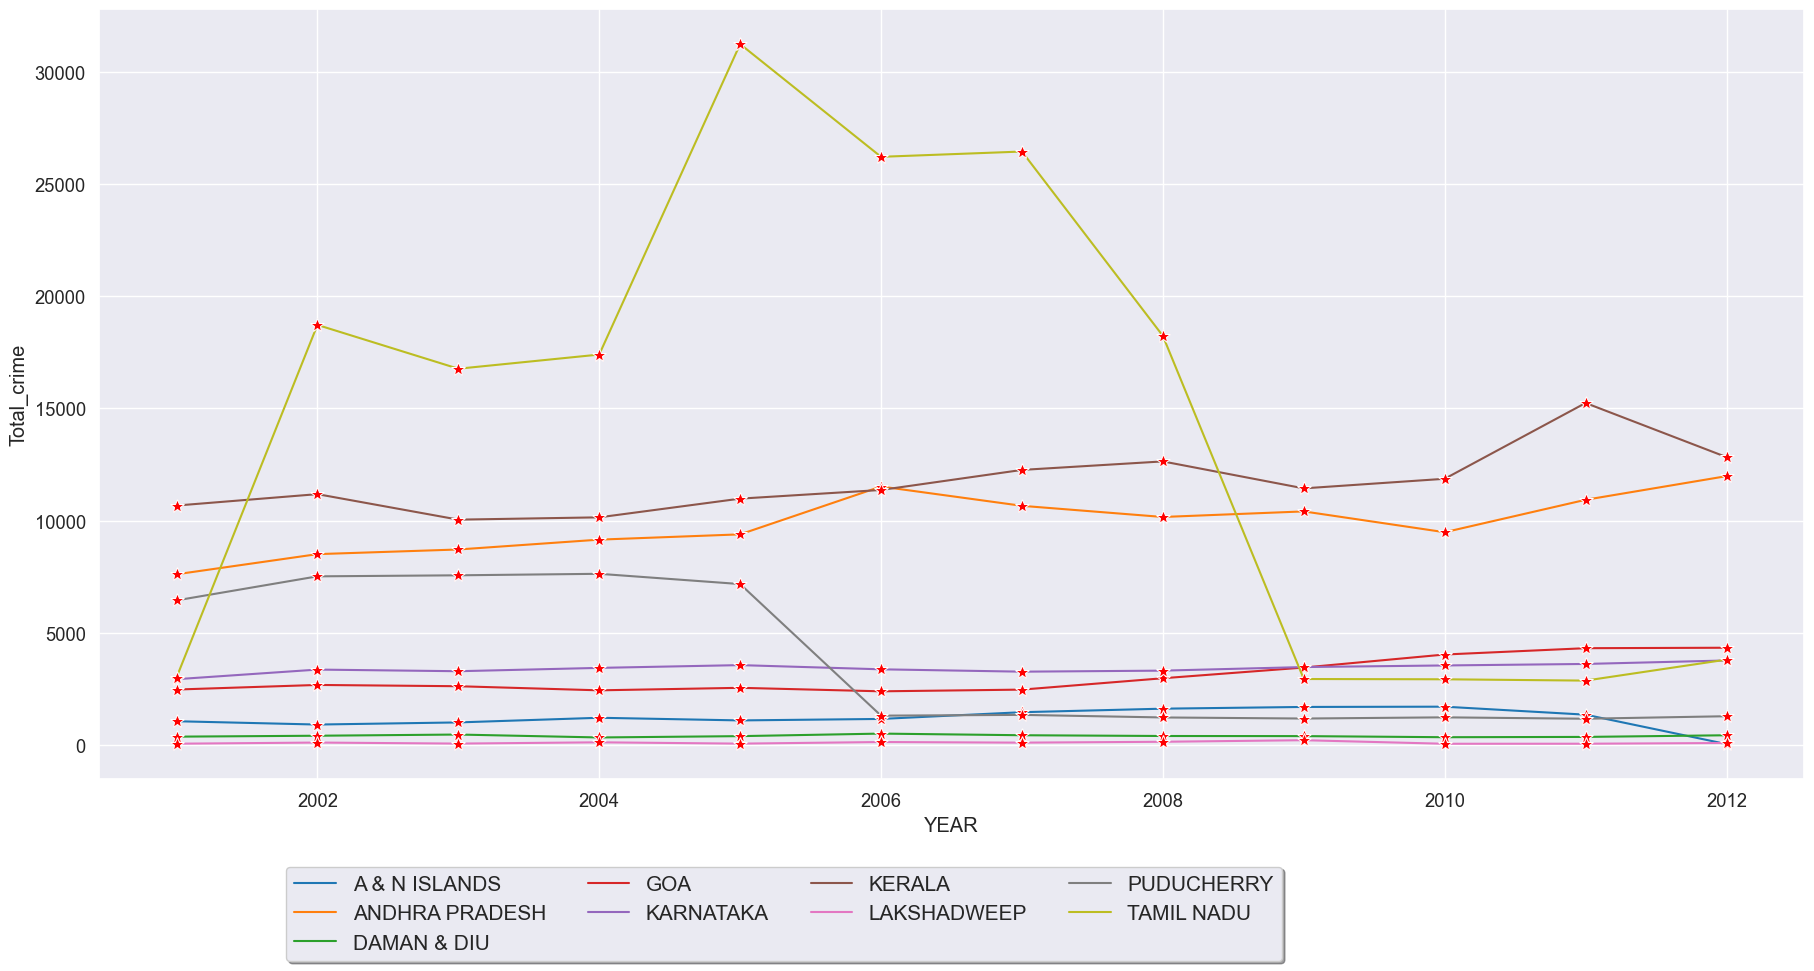

In [12]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=sr,x='YEAR',y='Total_crime',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.show()

The years 2005 and 2012 saw the highest and lowest crime rates for DAMAN & DIU. Since 2009, the rate of crime has been declining.
The GOA's crime rates peaked in 2012 and reached their lowest point in 2005. Since 2005, there has been a steady increase in the rate of crime.
The crime rate in Andhra Pradesh peaked in 2012 and peaked in 2006.
The year 2003 saw the lowest crime rate in Kerela, while 2011 saw the highest rate.
In PUDUCHERRY, the crime rate peaked in 2003 and fell in 2012.
The TAMIL NADU crime rate peaked in 2005 and reached its lowest point in 2009.
The crime rate in Karakataka peaked in 2010 and peaked in 2003.



In [13]:
si4=df.set_index("Region")
er= si4.loc[["Eastern"]]
er= er.reset_index()
er.head()

Region STATE/UT  YEAR  Literacy_Rate  Population   \
0  Eastern    BIHAR  2001          47.00   82878796.0   
1  Eastern    BIHAR  2002          48.48   85000862.0   
2  Eastern    BIHAR  2003          49.96   87122927.0   
3  Eastern    BIHAR  2004          51.44   89244993.0   
4  Eastern    BIHAR  2005          52.92   91367058.0   

   total literate population  Area (km²)  MURDER  ATTEMPT TO MURDER  \
0                   38953034       94163      47                 27   
1                   41208418       94163      61                 15   
2                   43526614       94163      49                 26   
3                   45907624       94163      66                 59   
4                   48351447       94163      68                 12   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  ...  INSULT TO MODESTY OF WOMEN  \
0                                          4  ...                           0   
1                                          2  ...                           0   
2                                          2  ...                           0   
3                                         12  ...                           0   
4                                          3  ...                           0   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                   50   
1                                   30   
2                                   24   
3                                   27   
4                                   19   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                           26   
1                                            0                           30   
2                                            0                           25   
3                                            0                           23   
4                                            1                           24   

   TOTAL IPC CRIMES   Crimes Against SCs  Crimes Against STs  \
0              2069                   43                   4   
1              2085                   40                   8   
2              2071                   38                   2   
3              2035                   86                  12   
4              1743                   31                   5   

   Crime_against_children  crime_against_women  Total_crime  
0                      12                  170         3756  
1                       0                  217         3732  
2                       6                   95         3507  
3                       5                  107         3842  
4                       5                  103         3045  

[5 rows x 41 columns]

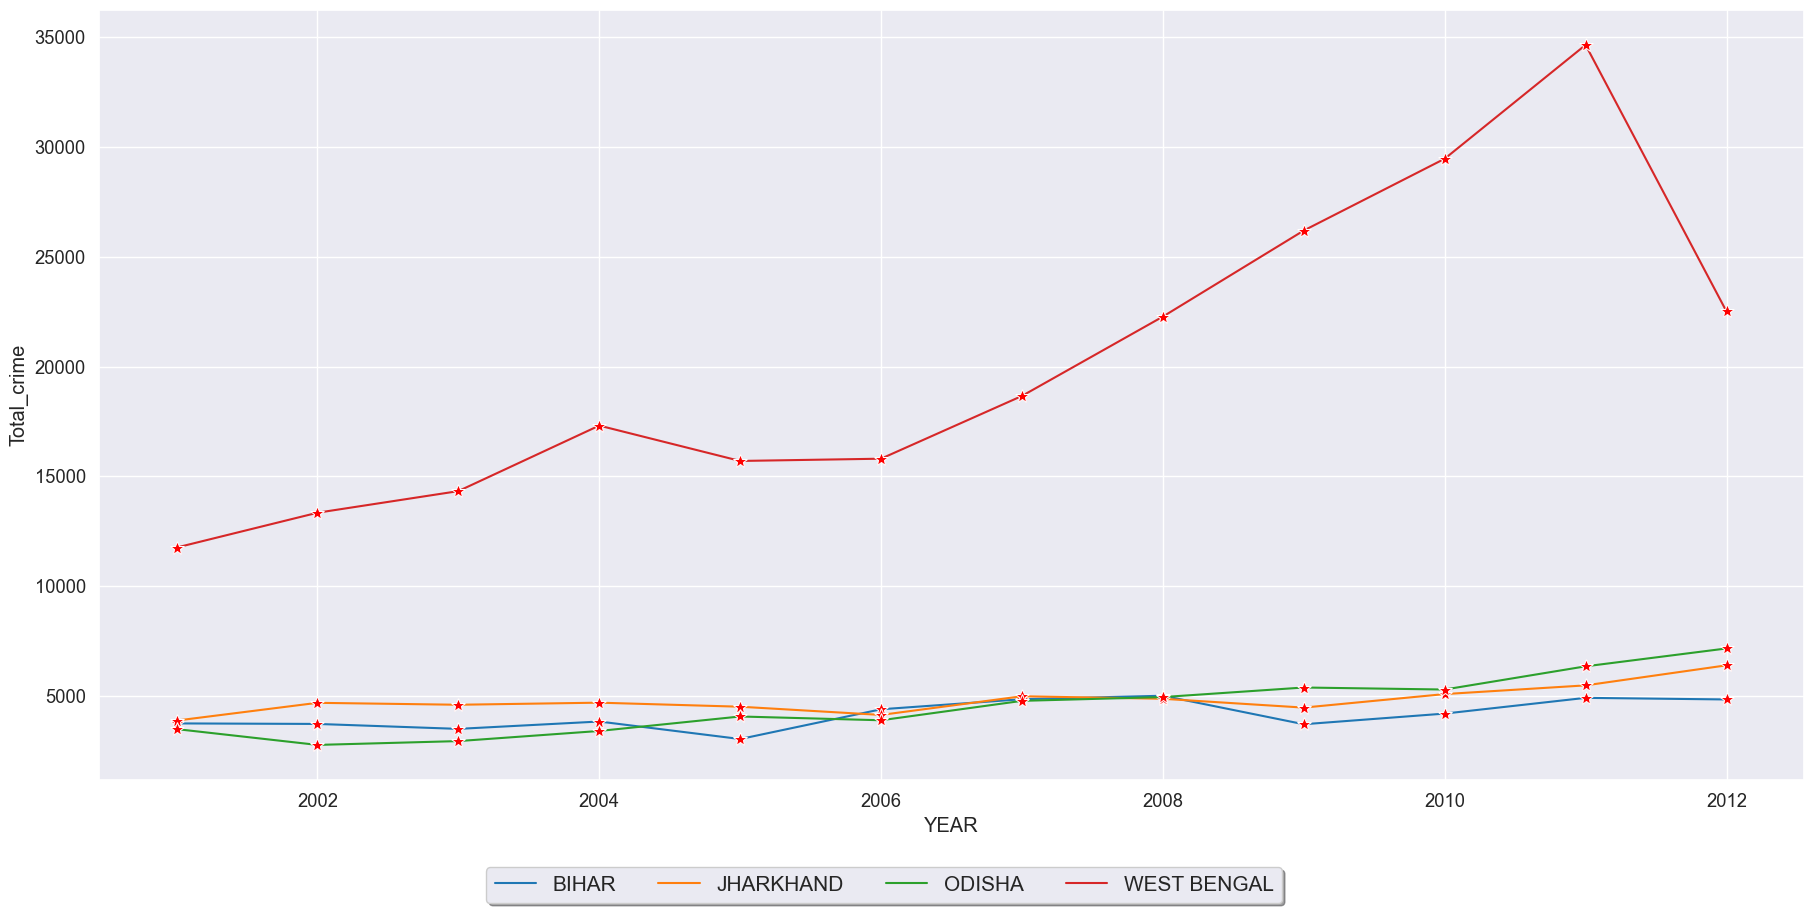

In [14]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=er,x='YEAR',y='Total_crime',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.show()

We can infer the following from above:

BIHAR's crime rate peaked in 2007 . Following a peak in crime in 2008, the rate of crime declined in 2005.
The state of JHARKHAND has its highest crime rate in 2012 and lowest in 2001.
ODISHA's crime rate peaked in 2012 and reached its lowest point in 2003.
Since 2005, West Bengal's crime rate has been steadily rising. It peaked in 2011 and reduced in 2012.
Thus, West Bengal had the highest crime rate in the Eastern Region, whereas Odisha had the highest rate prior to 2010.


In [18]:
si5=df.set_index("Region")
cr= si5.loc[["Central"]]
cr= cr.reset_index()
cr.head()

Region      STATE/UT  YEAR  Literacy_Rate  Population   \
0  Central  CHHATTISGARH  2001          70.28   20833803.0   
1  Central  CHHATTISGARH  2002          71.28   21262112.0   
2  Central  CHHATTISGARH  2003          72.28   21690420.0   
3  Central  CHHATTISGARH  2004          73.28   22118729.0   
4  Central  CHHATTISGARH  2005          74.28   22547038.0   

   total literate population  Area (km²)  MURDER  ATTEMPT TO MURDER  \
0                   14641997      135191      13                  2   
1                   15155633      135191      30                 21   
2                   15677836      135191      22                 19   
3                   16208605      135191      33                 20   
4                   16747940      135191      29                 16   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  ...  INSULT TO MODESTY OF WOMEN  \
0                                          0  ...                           0   
1                                          0  ...                           3   
2                                          0  ...                           3   
3                                          8  ...                          23   
4                                          5  ...                           5   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                    7   
1                                   19   
2                                   15   
3                                   14   
4                                   13   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            7   
1                                            0                           12   
2                                            0                           12   
3                                            0                           23   
4                                            0                           19   

   TOTAL IPC CRIMES   Crimes Against SCs  Crimes Against STs  \
0               235                    0                   0   
1               618                    0                   0   
2               488                    0                   0   
3               489                    3                  13   
4               521                    4                  13   

   Crime_against_children  crime_against_women  Total_crime  
0                       0                   44          513  
1                       6                   89         1194  
2                       0                   74          918  
3                      14                  102         1015  
4                       0                   75          988  

[5 rows x 41 columns]

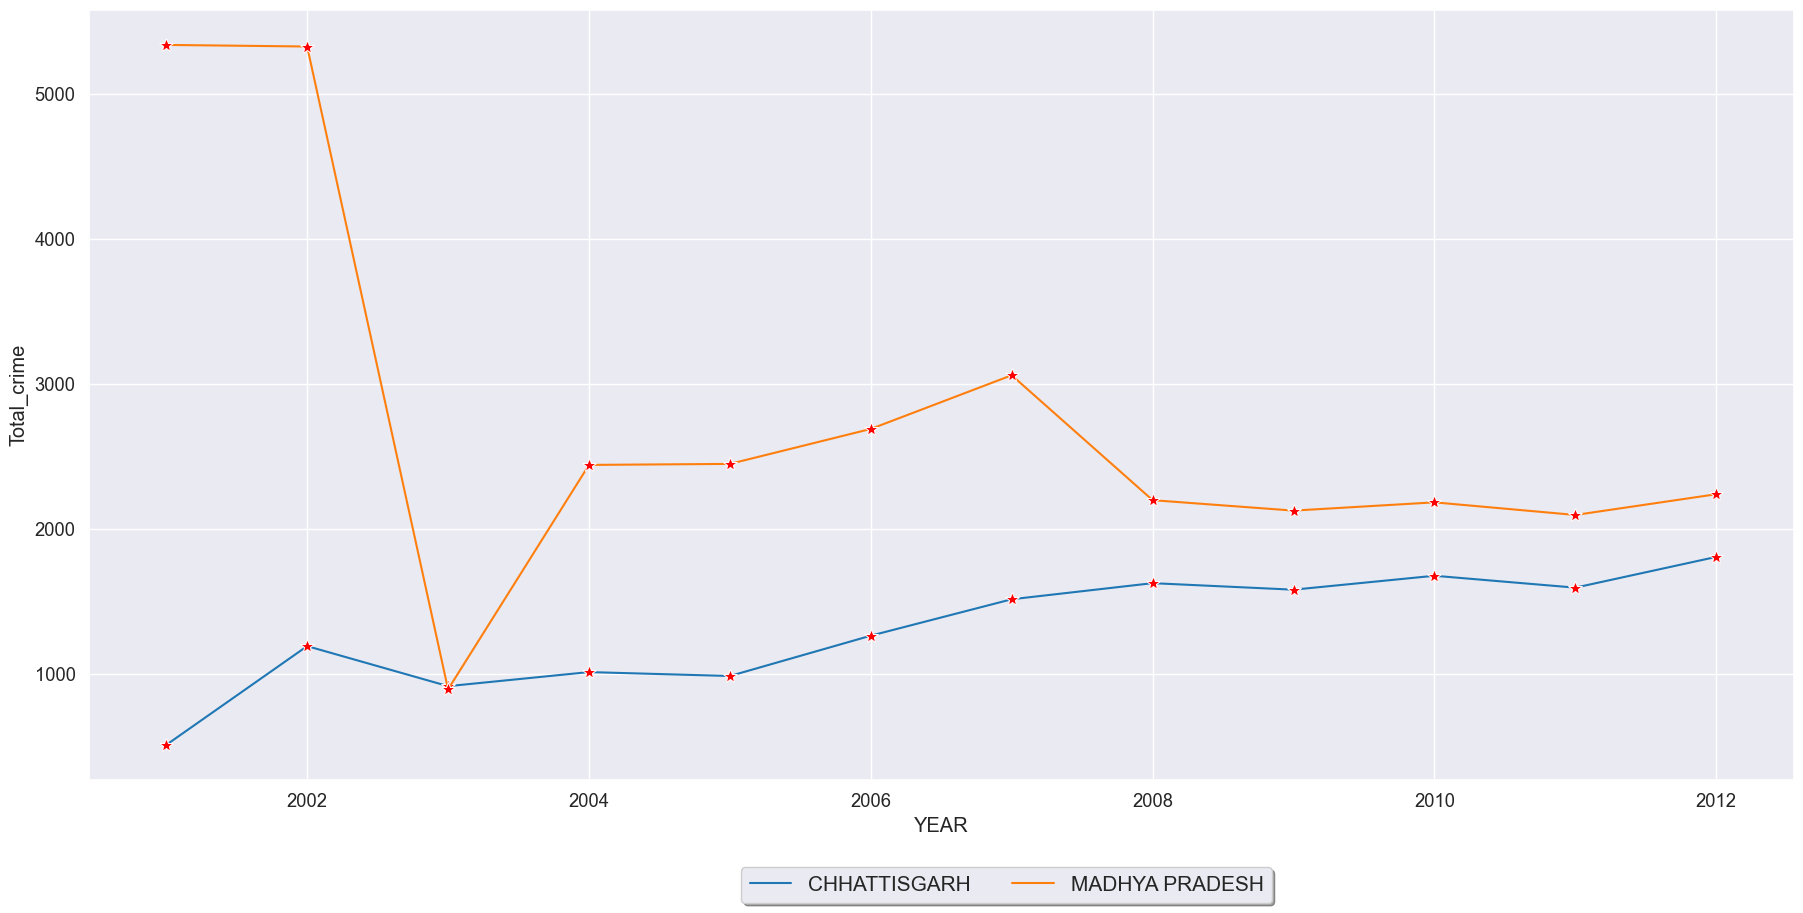

In [20]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=cr,x='YEAR',y='Total_crime',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.show()

As can be seen above

In Chattisgarh, the crime rate peaked in 2012 and peaked in 2003.
The crime rate in Madhya Pradesh peaked in 2001 (ranking second overall when compared to other states regardless of the year) and has since declined.
Madhya Pradesh has so consistently been at the top in the Central Region.




In [22]:
si6=df.set_index("Region")
ner= si6.loc[["Northeastern"]]
ner= ner.reset_index()
ner.head()

Region           STATE/UT  YEAR  Literacy_Rate  Population   \
0  Northeastern  ARUNACHAL PRADESH  2001          54.34    1091117.0   
1  Northeastern  ARUNACHAL PRADESH  2002          55.54    1120378.0   
2  Northeastern  ARUNACHAL PRADESH  2003          56.74    1146713.0   
3  Northeastern  ARUNACHAL PRADESH  2004          57.94    1170414.0   
4  Northeastern  ARUNACHAL PRADESH  2005          59.14    1191746.0   

   total literate population  Area (km²)  MURDER  ATTEMPT TO MURDER  \
0                     592913       83743      11                  2   
1                     622258       83743       9                  4   
2                     650645       83743      10                  1   
3                     678138       83743       8                  3   
4                     704799       83743       9                  6   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  ...  INSULT TO MODESTY OF WOMEN  \
0                                          0  ...                           0   
1                                          1  ...                           0   
2                                          0  ...                           0   
3                                          1  ...                           0   
4                                          4  ...                           0   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                    0   
1                                    2   
2                                    2   
3                                    1   
4                                    1   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            0   
4                                            0                            3   

   TOTAL IPC CRIMES   Crimes Against SCs  Crimes Against STs  \
0               163                    0                   5   
1               180                    0                   9   
2               145                    0                   4   
3               162                    0                  11   
4               148                    0                   3   

   Crime_against_children  crime_against_women  Total_crime  
0                       0                    6          311  
1                       2                    7          345  
2                       1                   13          295  
3                       3                   16          346  
4                       3                    9          306  

[5 rows x 41 columns]

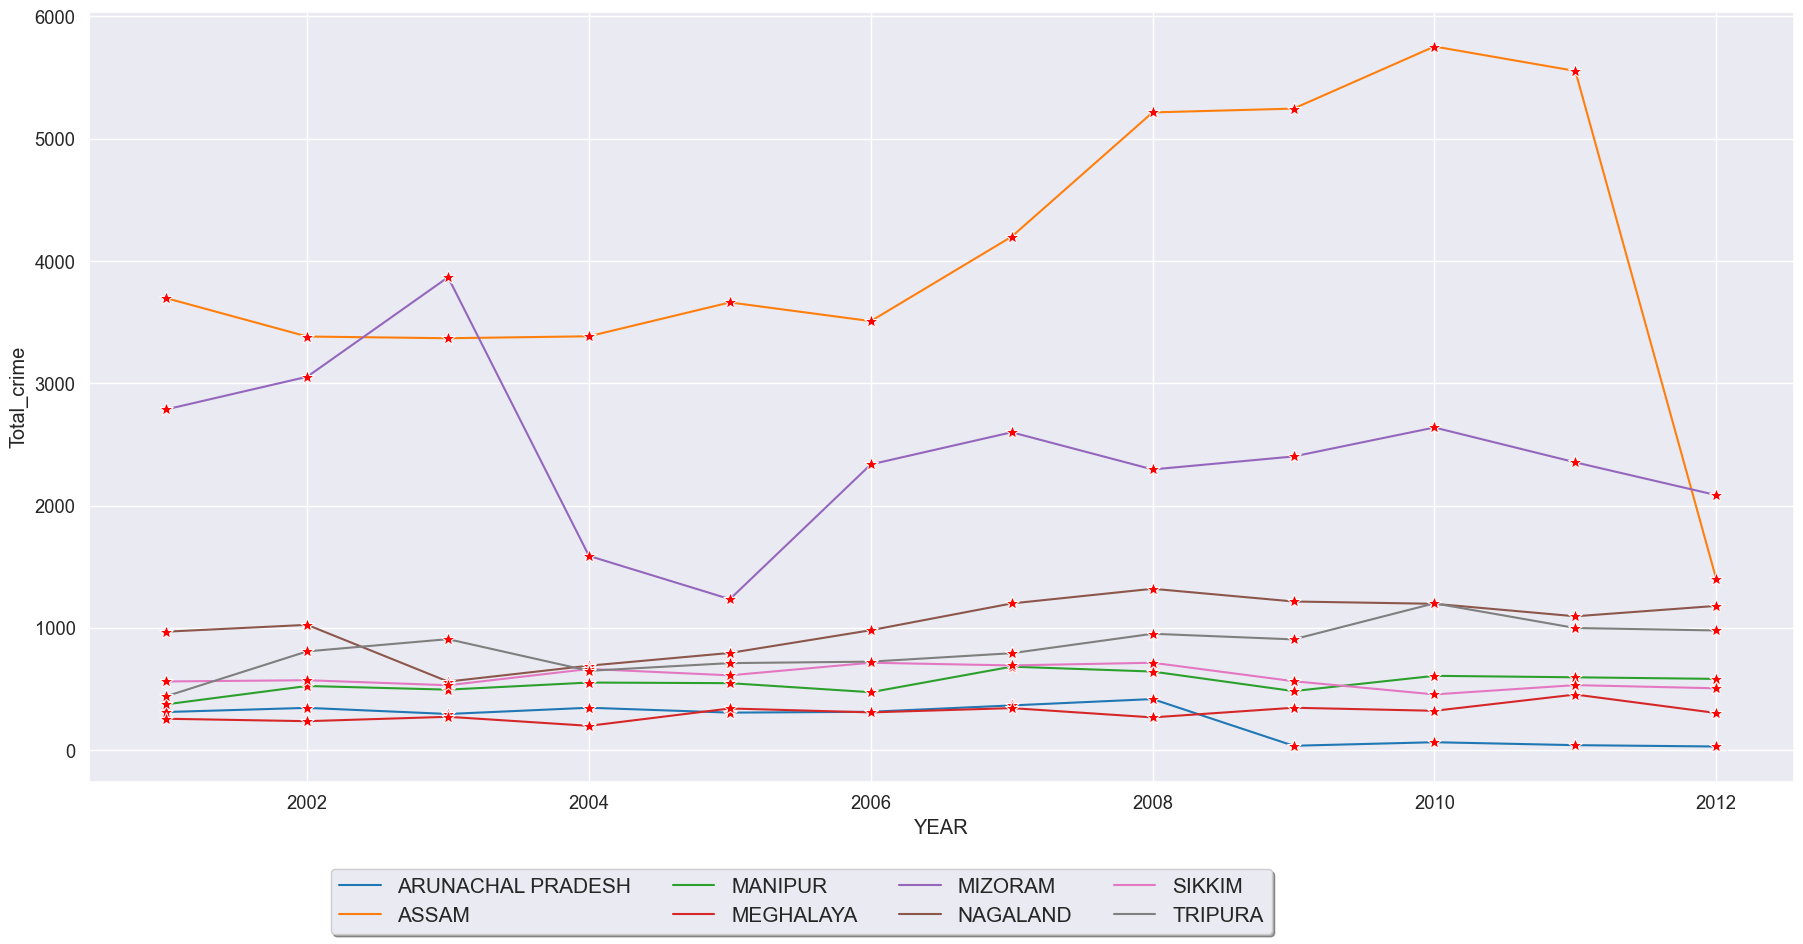

In [23]:
pt.figure(figsize=(22, 10))
sb.set(font_scale=1.2)
sb.lineplot(data=ner,x='YEAR',y='Total_crime',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
pt.show()

The graph above shows us the following:

The year 2001 saw the highest crime rate in ARUNACHAL PRADESH, while 2011 saw the lowest rate.
Manipur's crime rate peaked in 2007 and fell in 2010.
The crime rate in MIZORAM peaked in 2003 and fell in 2004.
SIKKIM's crime rate peaked in 2004 and reached its lowest point in 2003.
The years 2002 and 2012 saw the lowest and highest crime rates in ASSAM.
MEGHALAYA's crime rate peaked in 2011 and fell to its lowest point in 2003.
NAGALAND's crime rate peaked in 2008 and reached its lowest point in 2003.
The crime rate in TRIPURA peaked in 2012 and peaked in 2001.


# Analysis of area vs overall crime

In [31]:
df

STATE/UT  YEAR    Region  Literacy_Rate  Population   \
0    A & N ISLANDS  2001  Southern          81.30     356152.0   
1    A & N ISLANDS  2002  Southern          81.80     358531.0   
2    A & N ISLANDS  2003  Southern          82.30     360910.0   
3    A & N ISLANDS  2004  Southern          82.80     363290.0   
4    A & N ISLANDS  2005  Southern          83.30     365669.0   
..             ...   ...       ...            ...          ...   
415    WEST BENGAL  2008   Eastern          80.09   87239781.0   
416    WEST BENGAL  2009   Eastern          80.62   88248865.0   
417    WEST BENGAL  2010   Eastern          81.16   89257948.0   
418    WEST BENGAL  2011   Eastern          81.69   90267032.0   
419    WEST BENGAL  2012   Eastern          82.87   91276115.0   

     total literate population  Area (km2)  MURDER  ATTEMPT TO MURDER  \
0                       289552        8249      13                  0   
1                       293278        8249      14                  3   
2                       297029        8249      16                  4   
3                       300804        8249      13                  1   
4                       304602        8249      14                  3   
..                         ...         ...     ...                ...   
415                   69870341       88752     192                168   
416                   71146235       88752     229                238   
417                   72441751       88752     244                224   
418                   73739138       88752     232                215   
419                   75640517       88752     140                108   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  ...  \
0                                            0  ...   
1                                            0  ...   
2                                            1  ...   
3                                            2  ...   
4                                            3  ...   
..                                         ...  ...   
415                                         47  ...   
416                                        241  ...   
417                                        179  ...   
418                                        126  ...   
419                                         80  ...   

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             1                                    9   
1                             3                                    4   
2                             2                                    7   
3                             3                                    5   
4                             1                                    5   
..                          ...                                  ...   
415                           5                                 1946   
416                           3                                 2225   
417                           8                                 2378   
418                          10                                 2847   
419                           1                                 1860   

     IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                              0                            0   
1                                              0                            0   
2                                              0                            0   
3                                              0                            6   
4                                              0                            3   
..                                           ...                          ...   
415                                            0                           12   
416                                            0                            4   
417                                            5                           11   
418 

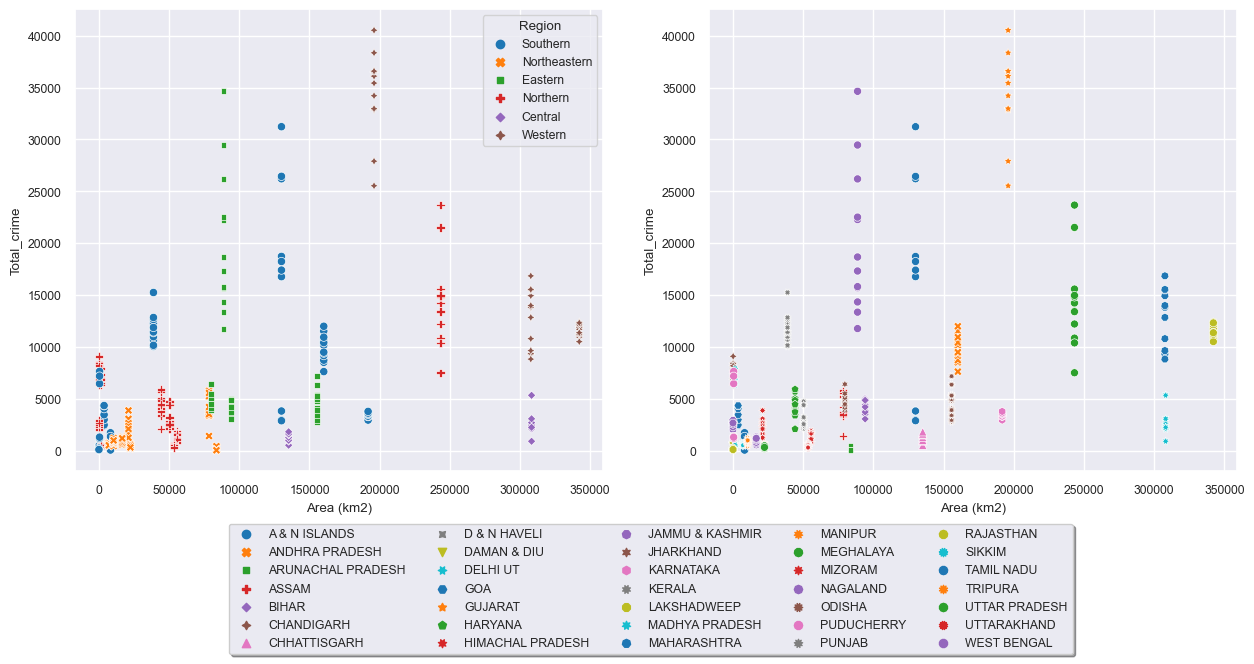

In [32]:
fig,axes = pt.subplots(1,2, figsize=(15,6))
sb.set(font_scale=0.8)
sb.scatterplot(ax=axes[0],x='Area (km2)',y='Total_crime',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Area (km2)',y='Total_crime',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

The graph shows that, in terms of area, Rajasthan is the largest state, followed by Maharashtra and Uttar Pradesh, while the states with the smallest areas are primarily islands and union territories.

The association between the state's AREA and total crimes is depicted in the graph. Various states are represented by the various colours. The AREA of the state and the TOTAL CRIMES have a positive association. The TOTAL CRIMES rises in tandem with the state's AREA.

Smaller AREAS in states/UT result in lower total crime rates.
Large AREAS in states/UT result in higher TOTAL CRIMES.


# Analysis of Population vs overall Crime

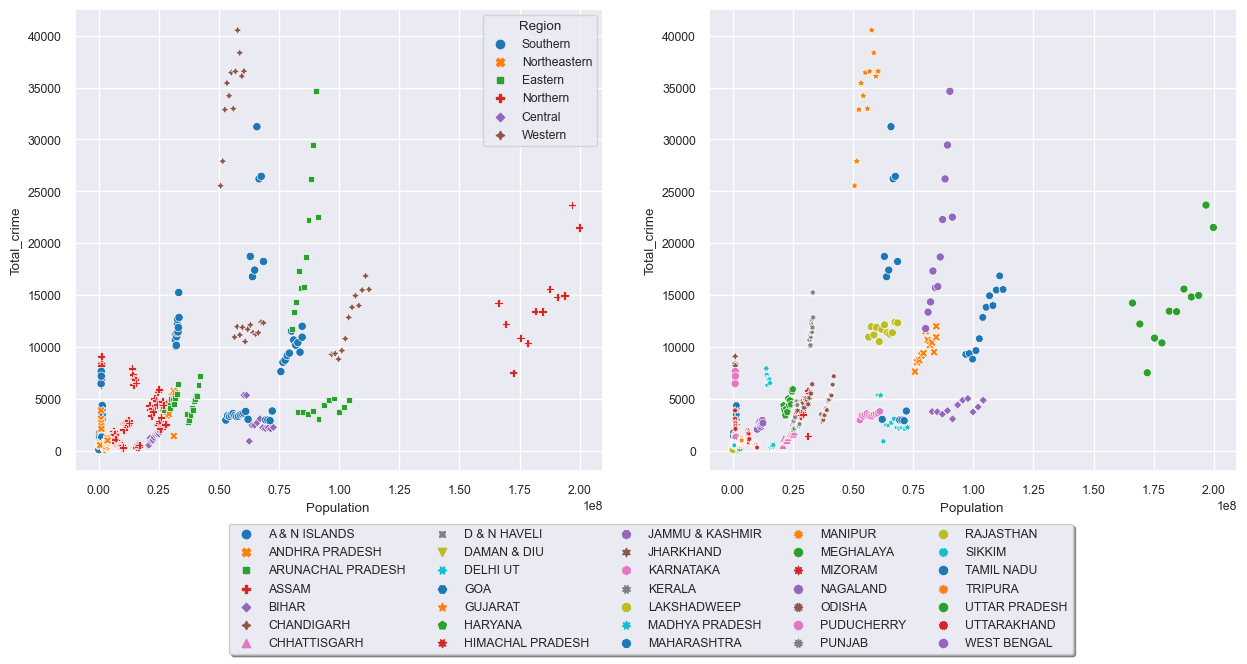

In [42]:
fig,axes = pt.subplots(1,2, figsize=(15,6))
sb.set(font_scale=0.8)
sb.scatterplot(ax=axes[0],x='Population ',y='Total_crime',data=df,hue='Region',palette='tab10',style='Region')
sb.scatterplot(ax=axes[1],x='Population ',y='Total_crime',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
pt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

We can see from the two graphs above that there is a direct correlation between population growth and total crime rates.

The second graph displays the total number of crimes on the X-axis, the total population on the Y-axis, and the various colours of the dots indicate the various states and territories. In terms of poulatio, Maharashtra and Gujarat come in first and second, respectively, while Uttar Pradesh ranks third.


# Each state crime report

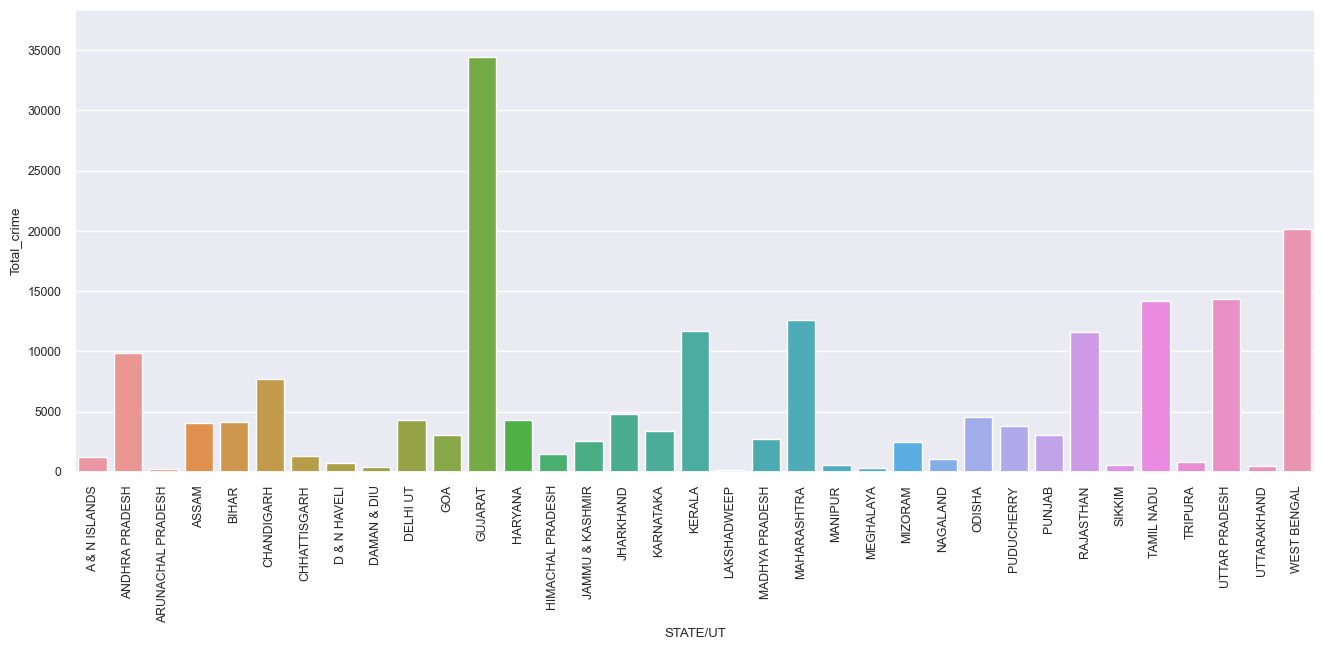

In [45]:
pt.figure(figsize=(16,6))
sb.barplot(x='STATE/UT', y='Total_crime',data=df,errwidth=0)
pt.xticks(rotation=90)
pt.show()

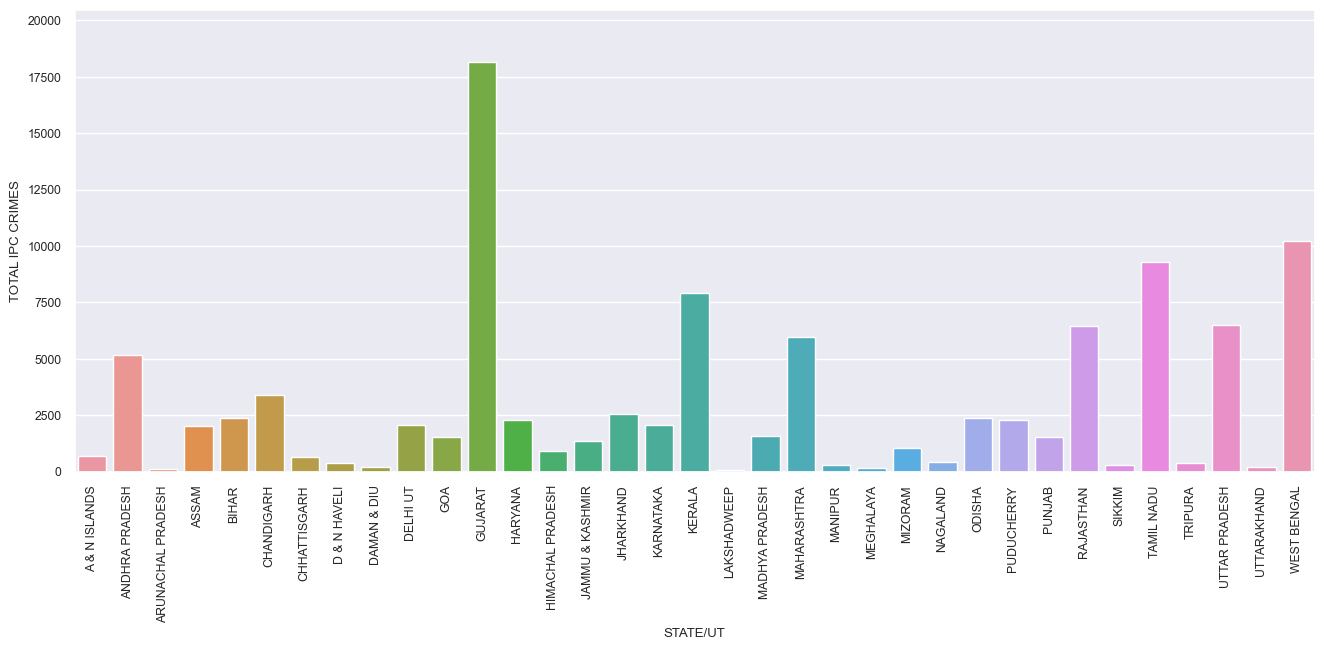

In [46]:
pt.figure(figsize=(16,6))
sb.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=df,errwidth=0)
pt.xticks(rotation=90)
pt.show()